### Note: I somehow deleted one of your comments accidentally when moving these cells around in VSCode. I think it might be good practice to just make a new notebook each week (the latest notebook will always be at this same link). All prior week's notebooks will be kept on the repo and referenced (with links) at the top of the latest notebook.

### Note: I somehow deleted one of your comments accidentally when moving these cells around in VSCode. I think it might be good practice to just make a new notebook each week (the latest notebook will always be at this link).

This notebook will be a continuation of the original notebook to make it easier to navigate. Based on what was discussed/found/commented on, many of the figures in the original need to be re-built before continuing.

I will summarize the issues and original figures below: 

Issues from original notebook: 
> ####  1. Unusual double peak in phase and amplitudes in admittance.
> ####  2. Seismic spectra not consistent with OBSIC/MUSTANG.
> ####  3. Pressure spectra not consistent with OBSIC.

> ####  Issue-1 Unusual double peak in phase and amplitudes in admittance.

Below are the original figures that showed the issue with phase and admittance. While the original data shows this, I could not reproduce it when making 

# Figure: QC of station daily power specta used to make the station average 
# Red are bad days.
![Figure](znb_images/7D.M07A.QC.png)

# Figure: Station Averaged Phase
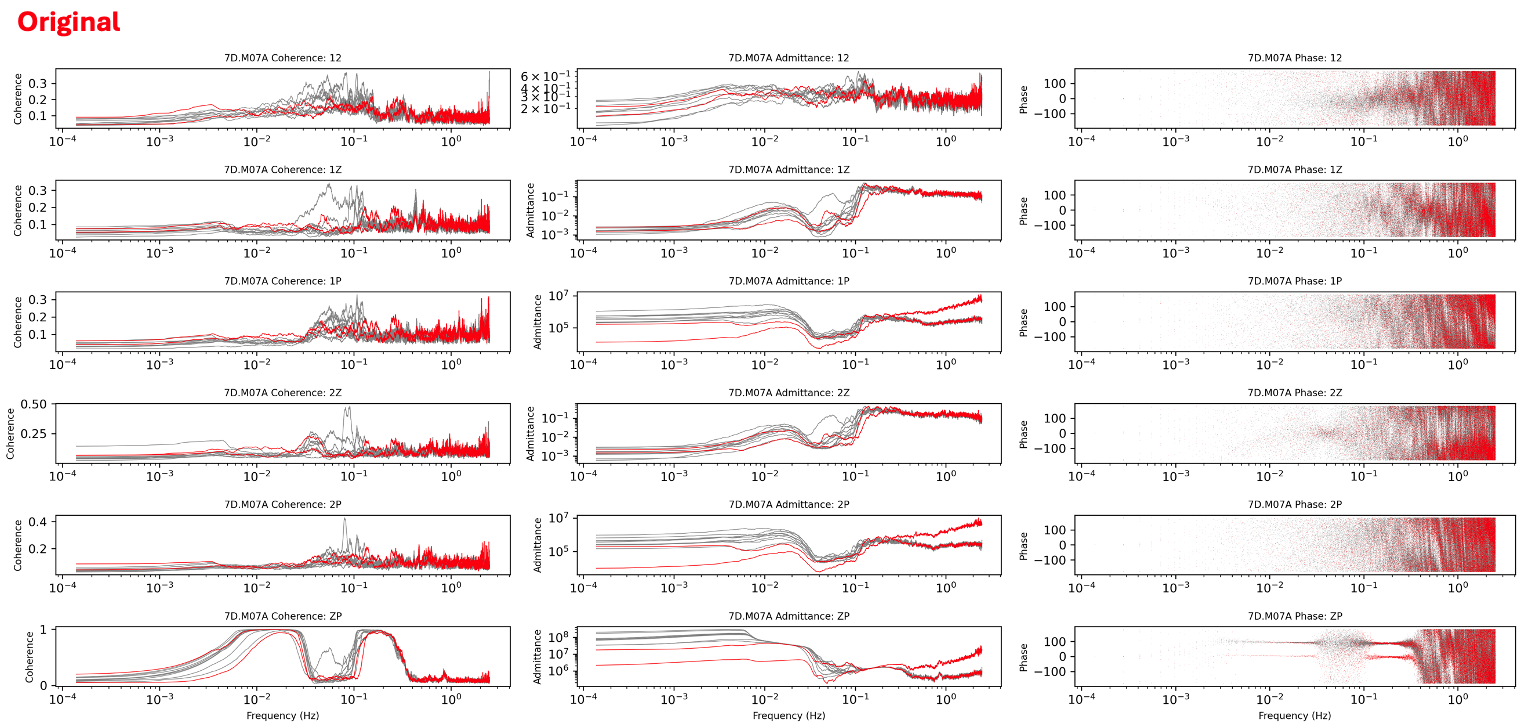

[Following your comment in the cell above](https://app.reviewnb.com/charleshoots/ATACR_HPS_Comp/blob/main/Cookbook.ipynb/file/#comment-nb-9f36807f)

<>

`[Note]` Each test below each use identical days as the original with a few more added as the bar for noise download after the original dataset was built was raised from 10 to 12.

### Test designs
`[Test-1]`:  Made by disabling the water-level approach in the instrument response removal aswell as forcing it to never add zeros to the poles (by setting output units equal to input units with output='DEF'). 

`[Test-2] and [Test-3]`: Made by running the two additional arguments (water_level=None, output='DEF') seperately in independent ATaCR runs. 

### Test results for station average spectra (below)
`[Test-1]` This setup produces spectra well within the range of values we see in the reference stations above.

`[Test-2] and [Test-3]`:This results in only minor dB changes that are just as inconsistent with the reference stations as the original is.
___
> ![Figure](znb_images/AVG.Spectra.Comparisons.png)



[On your second comment in the cell above](https://app.reviewnb.com/charleshoots/ATACR_HPS_Comp/blob/main/Cookbook.ipynb/file/#comment-nb-23a217e0)

___

### Results on coherence, admittance, and phase: 

> Coherence: Appears less sensitive than the other two metrics to this change in instrument response, with the most obvious changes shown in only a few days with different coherence values around 10s period.

> Admittance: Several magnitudes in changes are shown in admittance with any that were done against the pressure channel spectra (1P, 2P, and ZP). 

> Phase:  the phase is fundamentally different (fixed?) now in Test-1, lacking the double phase trends.

### Broken down by tests:

> **[Test-1]:** Just as with the average spectra tests above, Test-1 shows the greatest change in coherence, admittance, and phase.

> **[Tests -2 and -3]:** Likewise, -2 and -3 are nearly identical output to eachother and show the least change in the three metrics. 
>> Though these two tests likely show the least agreement with the reference stations as pointed out above, these two tests also resulted in the removal of the double phase trend shown in the original ATaCR setup.

`[Comment]`: It might help if I had the coherence/admittance outputs from the Matlab ATaCR to compare these tests. I will run ML-ATaCR if these tests still call for it.
 


### Overall findings of solution testing: 

> Across all three tests we also see the irregular phase double trend removed.

> Across all three tests we see the amount of days removed by the QC step (plotted in red) is now zero

> In total, these tests seem to indicate that the ATaCR code needs to be changed to be consistent with the execution done in Test-1.
___

> ![Figure](znb_images/Original.Coh.Adm.Ph.png)
___
> ![Figure](znb_images/Test1.Coh.Adm.Ph.png)
___
> ![Figure](znb_images/Test2.Coh.Adm.Ph.png)
___
> ![Figure](znb_images/Test3.Coh.Adm.Ph.png)

[On your third comment in the cell above](https://app.reviewnb.com/charleshoots/ATACR_HPS_Comp/blob/main/Cookbook.ipynb/file/#comment-nb-cedcb5a4)

<>

##### [Figure placeholder]
<!-- # Figure: All Transfer Functions (daily and averaged) -->
![Figure](znb_images/7D.M07A.transfer_functions_Taper1.png)

> The final step in ATaCR is correcting the event. For this station-averaged correction, we use the ZP-21 transfer function. 

> After calculating the 4-component event spectra using fft (ftZ, ftP, ft1, and ftP),

> The ZP-21 transfer function deconvolves tilt and compliance noise from the vertical event spectra (ftZ) as follow:

Corrected = ftZ - TF_Z1*ft1  -  (ft2-ft1*TF_21)*TF_Z2_1  -  (ftP - ft1*TF_P1 -(ft2 - ft1*TF_21)*TF_P2_1)*TF_ZP_21

> The corrected spectra is returned to the time-domain, plotted, and saved.

##### [Figure placeholder]
# Figure: Corrected event traces plot by ATaCR 
## For the four transfer functions available to a station-averaged spectra.
![Figure](znb_images/7D.M07A.2012.181.21.07.sta_corrected.png)

[On your fourth comment in the celll above](https://app.reviewnb.com/charleshoots/ATACR_HPS_Comp/blob/main/Cookbook.ipynb/file/#comment-nb-e92e9410)